<a href="https://colab.research.google.com/github/Fario-codes/SPARKS-FOUNDATION-TASKS/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author :Mohammed Farid Ul Ali N

Task-2 Prediction using Unsupervised ML
The task was to predict the optimum number of clusters from the given ‘Iris’ dataset, and represent it visually.

Step-1 Importing Libraries
I started by importing pandas, numpy, matplotlib and sikit learn I also imported warnings libraries to avoid any unwanted prompts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings as wg
wg.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)

Step-2 Visualising the Data

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 4)

In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Step-3 Finding Optimal Cluster

In [12]:
x = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show>

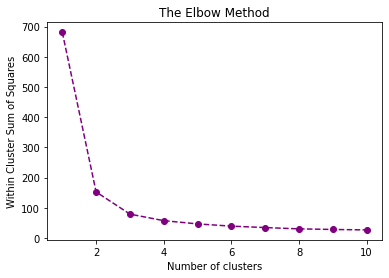

In [13]:
plt.plot(range(1,11), wcss, 'go--', color="purple")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show

Step-4 Visualising the Clusters

In [15]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(df)

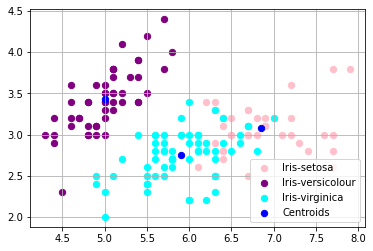

In [17]:
x = df.iloc[:, [0,1,2,3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 40, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 40, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 40, c = 'aqua', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=40, c = 'blue', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()